<a href="https://colab.research.google.com/github/Sukantasai/PyTorch-code/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch
from torch import nn #nn contain all PuTorch's bulding blocks for neural networks
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'2.3.0+cu121'

In [48]:
# Create known parameters
weight = 0.7
bias=0.3
# Create data
start =0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [49]:
# Create train and test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, rest of 20% testing set
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [50]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10, 7))
  # Plot training data in Blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g", s=4, label="Testing Data")

  if predictions is not None:
    # plot the prediction in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    # Show the legend
    plt.legend(prop={"size":14});

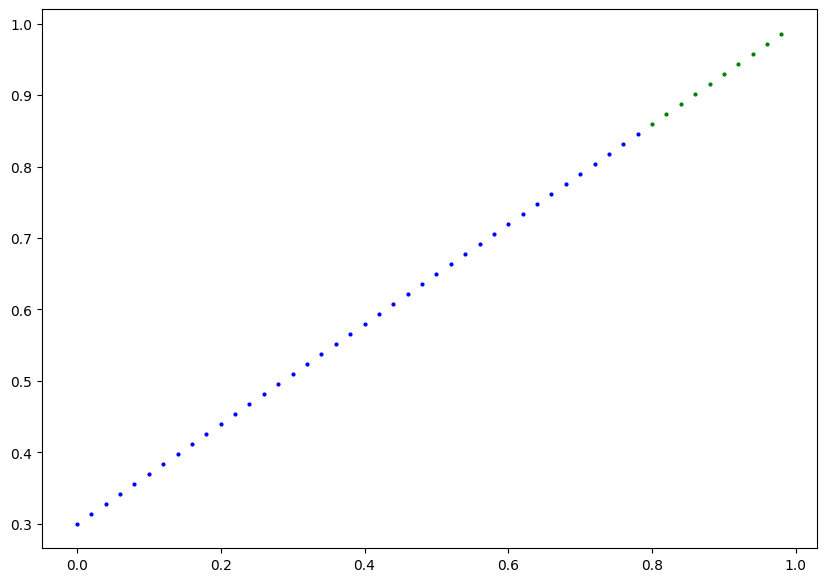

In [51]:
plot_predictions();

In [52]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float),
                                requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # this is the linear regression formula(y=mx + b)


In [53]:
# Set manual seed since n.parameter are randomly initialize
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

#Check the nn.parameter within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [54]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [55]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)


In [56]:
# Check the predictions
print(f"Number of testing samples:{len(X_test)}")
print(f"Number of predictions made:{len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples:10
Number of predictions made:10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


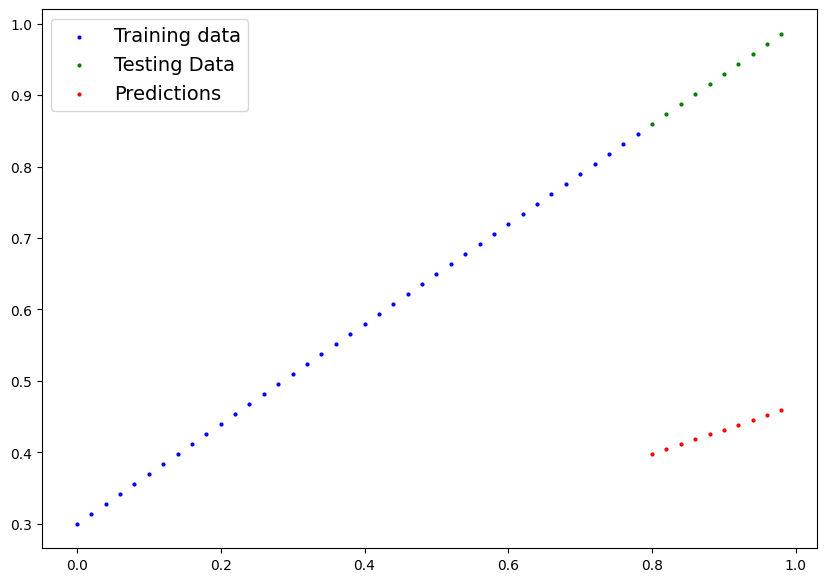

In [57]:
plot_predictions(predictions=y_preds)

In [58]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [59]:
# Create the loss function
loss_fn = nn.L1Loss() # mean absulate error loss is same as L1Loss

#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), #parameters of terget model to optimize
                            lr=0.01)#Learning Rate

In [60]:
torch.manual_seed(42)
# Set the number of epochs (how many time the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  #put model in training mode(this is default state of a model)
  model_0.train()
  # 1. Forward pass on train data using the forward() method inside
  y_pred = model_0(X_train)
  # print(y_pred)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Progress the optimizer
  optimizer.step()

  # Put the model in evaliuate mode
  model_0.eval()
  with torch .inference_mode():
    # 1. forword pass on test data
    test_pred = model_0(X_test)
    #2. Calcuate loss ooon test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 ==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch}| MAE Train Loss : {loss} | MAE Test Loss:{test_loss}")

Epoch:0| MAE Train Loss : 0.31288138031959534 | MAE Test Loss:0.48106518387794495
Epoch:10| MAE Train Loss : 0.1976713240146637 | MAE Test Loss:0.3463551998138428
Epoch:20| MAE Train Loss : 0.08908725529909134 | MAE Test Loss:0.21729660034179688
Epoch:30| MAE Train Loss : 0.053148526698350906 | MAE Test Loss:0.14464017748832703
Epoch:40| MAE Train Loss : 0.04543796554207802 | MAE Test Loss:0.11360953003168106
Epoch:50| MAE Train Loss : 0.04167863354086876 | MAE Test Loss:0.09919948130846024
Epoch:60| MAE Train Loss : 0.03818932920694351 | MAE Test Loss:0.08886633068323135
Epoch:70| MAE Train Loss : 0.03476089984178543 | MAE Test Loss:0.0805937647819519
Epoch:80| MAE Train Loss : 0.03132382780313492 | MAE Test Loss:0.07232122868299484
Epoch:90| MAE Train Loss : 0.02788739837706089 | MAE Test Loss:0.06473556160926819


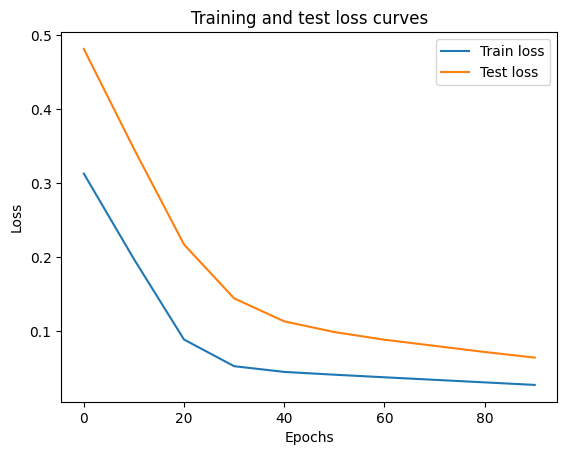

In [61]:
# plot the loss curve
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [62]:
#find our model's learned parameter
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [63]:
# 1. set the model in evaluation mode
model_0.eval()
 # 2. setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

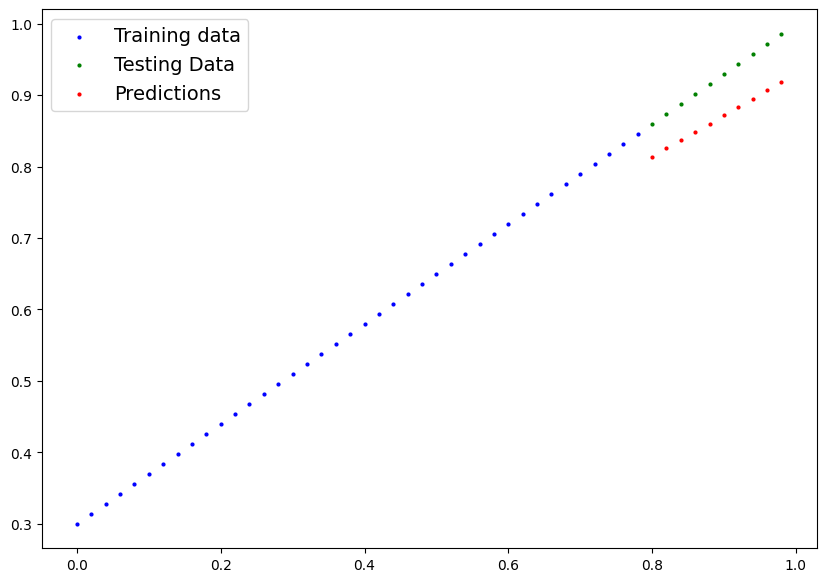

In [64]:
plot_predictions(predictions=y_preds)

In [65]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model_0.pth


In [66]:
# check the saved file path
!ls -l models/pytorch_workflow_model_0.pth


-rw-r--r-- 1 root root 1662 Jun  1 19:51 models/pytorch_workflow_model_0.pth


In [67]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [68]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [69]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [70]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

In [71]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cuda


In [72]:
weights = 0.7
bias = 0.3
# Create renge values
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [73]:
train_split = int(0.8 *len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

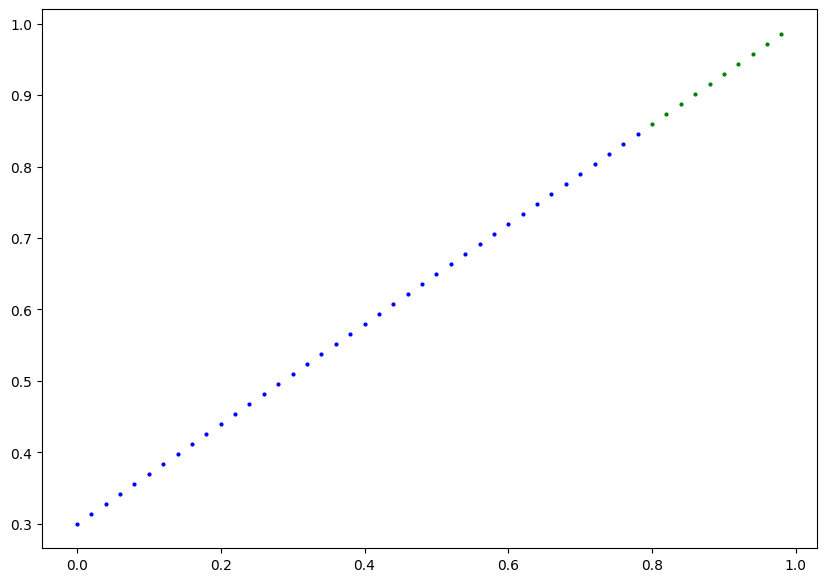

In [74]:
plot_predictions(X_train, y_train, X_test, y_test)

In [75]:
#subclass nn.module to make our model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
     super().__init__()
     #use nn.Linear() for creating the model parameter
     self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  #define the forward computation(input data x flows through nn.Linear())
  def forward(self, X: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(X)

# set the manual seed when creating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [76]:
# Check the model device
next(model_1.parameters()).device

device(type='cpu')

In [77]:
# Set model to GPU if it's avalaible , otherwise it'll default to CPU
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [78]:
# Create loss function
loss_fn  = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [79]:
torch.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put data on the available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # Training
  model_1.train()

  # forward pass
  y_pred = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # zero grad optimizer
  optimizer.zero_grad()

  # backward loss
  loss.backward()

  # step the optimizer
  optimizer.step()

  # Testing
  model_1.eval()

  # Forward pass
  with torch.inference_mode():
    test_pred = model_1(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Train loss:{loss} | Test loss:{test_loss}")

Epoch:0 | Train loss:0.5551779866218567 | Test loss:0.5739762187004089
Epoch:100 | Train loss:0.006215683650225401 | Test loss:0.014086711220443249
Epoch:200 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:300 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:400 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:500 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:600 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:700 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:800 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882
Epoch:900 | Train loss:0.0012645035749301314 | Test loss:0.013801801018416882


In [80]:
# Find the model's learned parameteres
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\n And thr original values for weights and bias are:")
print(f"weights: {weights}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

 And thr original values for weights and bias are:
weights: 0.7, bias: 0.3


In [81]:
# Turn model into evaluation mode
model_1.eval()

# Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

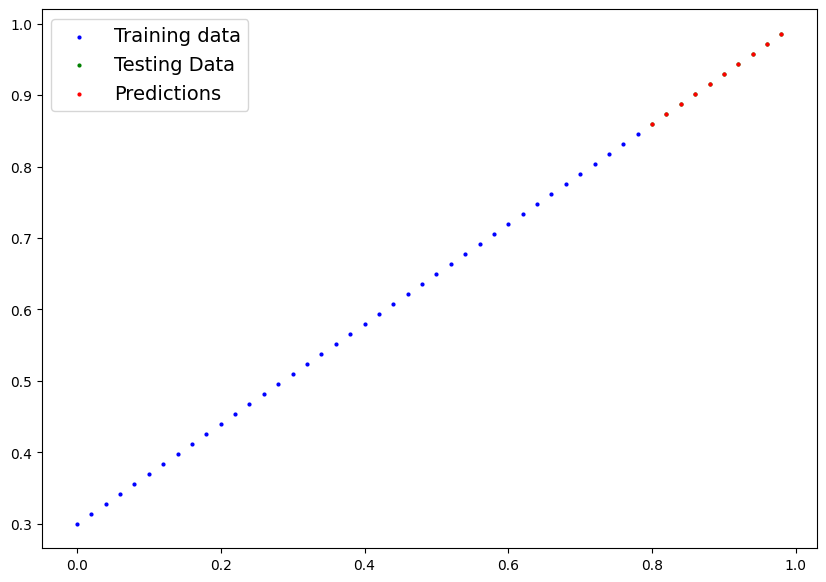

In [82]:
plot_predictions(predictions=y_preds.cpu())

In [84]:
from pathlib import Path
# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME ="pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/pytorch_workflow_model_1.pth


In [86]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model :\n {loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device} ")

Loaded model :
 LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0 


In [89]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')